<a href="https://colab.research.google.com/github/KEMAL-MUDIE/CV/blob/main/Panoptic_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation

Should change runtime to have GPU Hardware accelerator: Runtime > Change runtime > Hardware accelerator: GPU.

In [ ]:
!python --version

Python 3.10.12


In [ ]:
import torch
print(torch.__version__)

2.1.0+cu121


In [ ]:
!python -m pip install \
'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-0e6lypc0
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-0e6lypc0
  Resolved https://github.com/facebookresearch/detectron2.git to commit e9f7e2ba15abd7badcb05ef6f5076f06b36a9c5b
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 15.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for detectron2: filename=detectron2-0.6-cp310-cp310-linux_x86_64.whl size=6119622 sha256=e30d5b69b168f8b4ccbabdf70a45

# Get a predictor

In [ ]:
import detectron2
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
# Suppress some user warnings
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
# Select a model
config_file = "COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml"
checkpoint_url = "COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml"
# Create a configuration file
cfg = get_cfg()
config_file = model_zoo.get_config_file(config_file)
cfg.merge_from_file(config_file)
# Download weights
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(checkpoint_url)
score_thresh_test = 0.95
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = score_thresh_test
predictor = DefaultPredictor(cfg)

model_final_cafdb1.pkl: 261MB [00:01, 165MB/s]                           


# Perform inference

In [ ]:
!wget https://raw.githubusercontent.com/PacktPublishing/Hands-On-Computer-Vision-with-Detectron2/main/datasets/960x720image/input.jpg

--2024-01-06 23:22:30--  https://raw.githubusercontent.com/PacktPublishing/Hands-On-Computer-Vision-with-Detectron2/main/datasets/960x720image/input.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 107917 (105K) [image/jpeg]
Saving to: ‘input.jpg’

input.jpg           100%[===================>] 105.39K  --.-KB/s    in 0.01s   

2024-01-06 23:22:30 (8.12 MB/s) - ‘input.jpg’ saved [107917/107917]



In [ ]:
import cv2
input_url = "/content/WhatsApp Image 2023-06-13 at 12.12.45 PM.jpeg"
img = cv2.imread(input_url)
output = predictor(img)

In [ ]:
print(output)

{'sem_seg': tensor([[[ 0.7377,  0.7386,  0.7437,  ...,  1.7664,  1.9533,  1.9862],
         [ 0.7501,  0.7522,  0.7642,  ...,  1.7738,  1.9514,  1.9826],
         [ 0.8207,  0.8296,  0.8802,  ...,  1.8158,  1.9403,  1.9622],
         ...,
         [ 3.0963,  3.1243,  3.2830,  ...,  4.3072,  4.1443,  4.1156],
         [ 3.0670,  3.0916,  3.2316,  ...,  4.1398,  4.0024,  3.9782],
         [ 3.0449,  3.0678,  3.1977,  ...,  3.9928,  3.8770,  3.8566]],

        [[ 0.2309,  0.2344,  0.2545,  ...,  0.3628,  0.4066,  0.4143],
         [ 0.2326,  0.2362,  0.2571,  ...,  0.3625,  0.4052,  0.4127],
         [ 0.2422,  0.2467,  0.2722,  ...,  0.3608,  0.3972,  0.4036],
         ...,
         [-0.7571, -0.7545, -0.7394,  ..., -0.0106,  0.0284,  0.0353],
         [-0.7032, -0.6992, -0.6763,  ...,  0.0188,  0.0565,  0.0631],
         [-0.6509, -0.6453, -0.6139,  ...,  0.0747,  0.1092,  0.1153]],

        [[-3.2751, -3.2752, -3.2755,  ..., -3.0788, -3.0317, -3.0234],
         [-3.2740, -3.2740, -3.27

In [ ]:
output["panoptic_seg"][0].shape

torch.Size([673, 667])

# Visualization

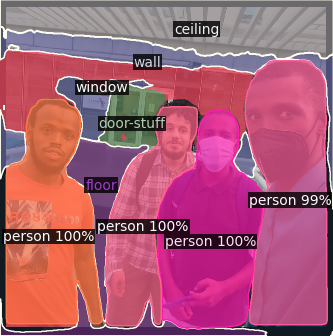

In [ ]:
from google.colab.patches import cv2_imshow
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
metadata = MetadataCatalog.get(cfg.DATASETS.TRAIN[0])
v = Visualizer(img[:, :, ::-1], metadata, scale=0.5)

panoptic_seg, segments_info = output["panoptic_seg"]
annotated_img = v.draw_panoptic_seg_predictions(panoptic_seg.to("cpu"), segments_info)

cv2_imshow(annotated_img.get_image()[:, :, ::-1])